In [33]:
# import necessary modules

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import requests
import pickle
import json
import matplotlib.pyplot as plt
import seaborn as sns


raw_df = pd.read_csv('data/recurrence.csv')

In [34]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
Age            286 non-null object
Postmeno       286 non-null object
Tumor_size     286 non-null object
InvNode        286 non-null object
NodeCaps       286 non-null object
Deg_malig      286 non-null int64
Breast_side    286 non-null object
Quadrant       286 non-null object
Radiation      286 non-null object
Class          286 non-null object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


In [35]:
raw_df.isnull().sum()

Age            0
Postmeno       0
Tumor_size     0
InvNode        0
NodeCaps       0
Deg_malig      0
Breast_side    0
Quadrant       0
Radiation      0
Class          0
dtype: int64



- When we analysis the dataset with info() and isnull() for missing value it does not show any missing values.


- Because in this dataset the missing values are represented by ? 

In [36]:
df = raw_df.copy()
# categorical boolean mask
categorical_feature_mask = df.dtypes == object

# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

print(categorical_cols)

# Label Encoding 
le = LabelEncoder()

df[categorical_cols] = df[categorical_cols].apply(
    lambda col: le.fit_transform(col))



['Age', 'Postmeno', 'Tumor_size', 'InvNode', 'NodeCaps', 'Breast_side', 'Quadrant', 'Radiation', 'Class']


In [37]:
X = df.drop('Class', axis = 1) # independent variables 
y = df.Class # dependent variable

### Exploratory data analysis

In [38]:
from sklearn.preprocessing import Imputer

#Missing values imputation
X[['NodeCaps','Quadrant']] = X[['NodeCaps','Quadrant']].replace(0, np.NaN)
#X.fillna(df.mean(), inplace=True)
imputation = Imputer(missing_values="NaN", strategy="most_frequent", axis = 0)

imputation = imputation.fit(X[['NodeCaps','Quadrant']])
X[['NodeCaps','Quadrant']] = imputation.transform(X[['NodeCaps','Quadrant']])


D:\AI\Anaconda3\envs\UKDL\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [39]:
df.groupby('Class').count()

,Age,Postmeno,Tumor_size,InvNode,NodeCaps,Deg_malig,Breast_side,Quadrant,Radiation
Class,,,,,,,,,
0,201,201,201,201,201,201,201,201,201
1,85,85,85,85,85,85,85,85,85


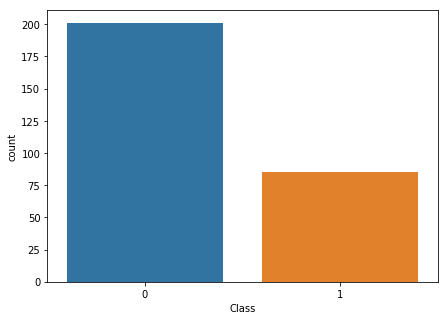

In [40]:
# EDA 
plt.figure(figsize=(7,5))
ax = sns.countplot(y, label = 'Count')

D:\AI\Anaconda3\envs\UKDL\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\AI\Anaconda3\envs\UKDL\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\AI\Anaconda3\envs\UKDL\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\AI\Anaconda3\envs\UKDL\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


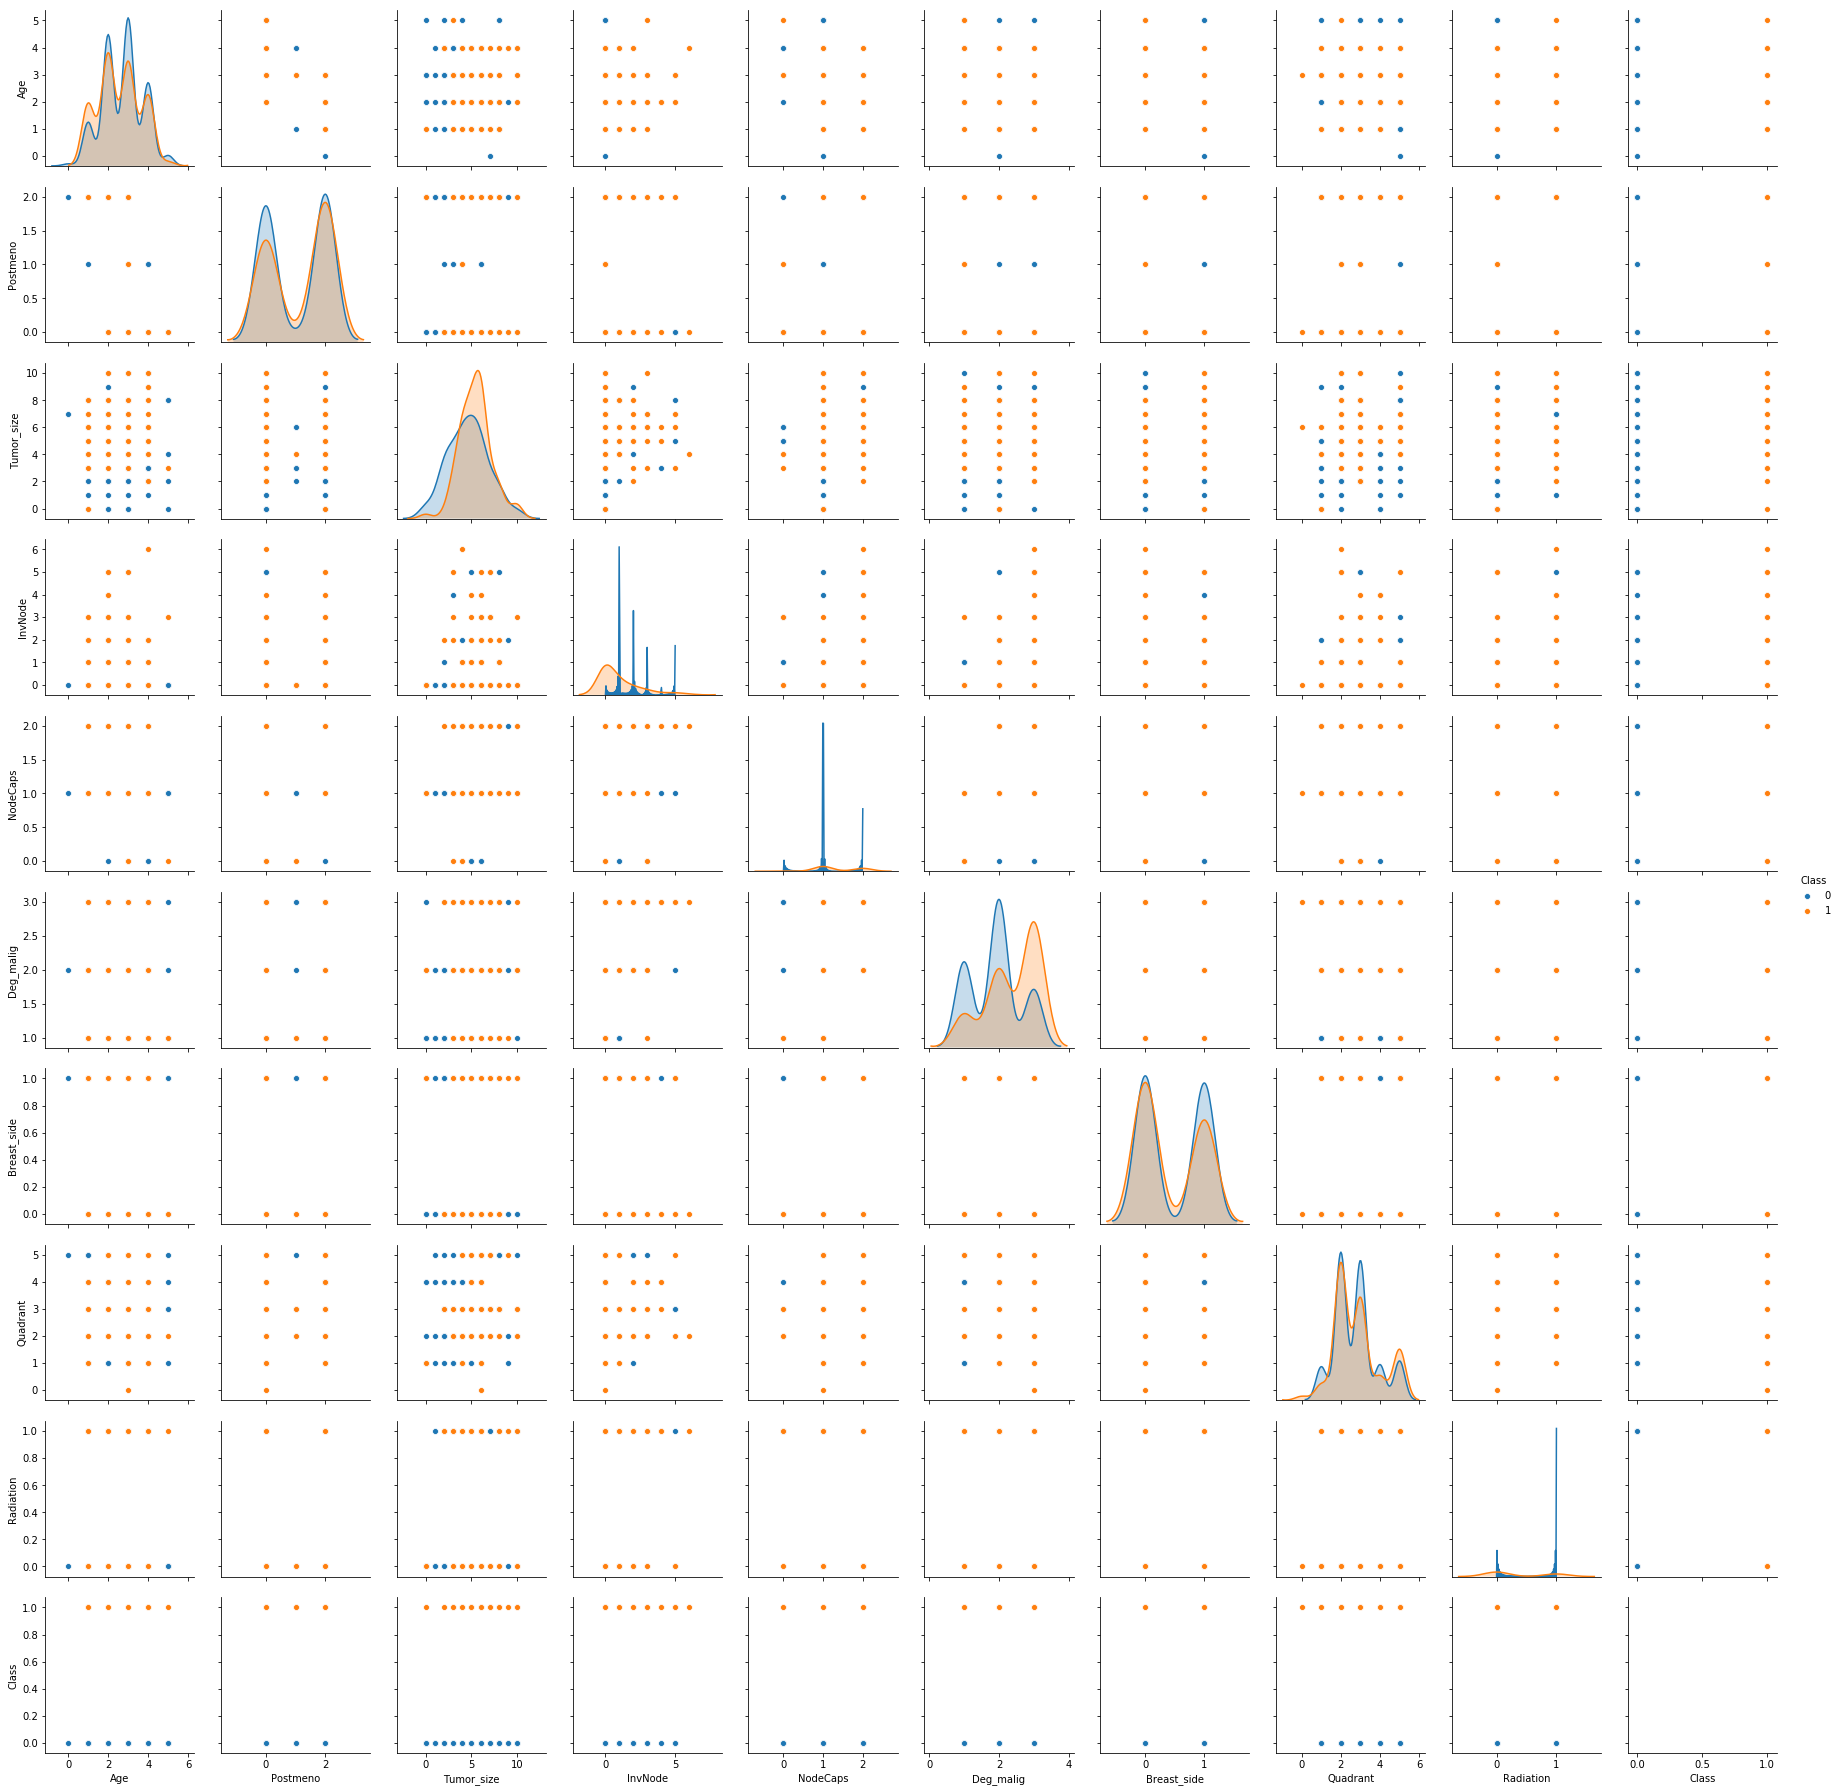

In [41]:
sns.pairplot(df, hue = 'Class')

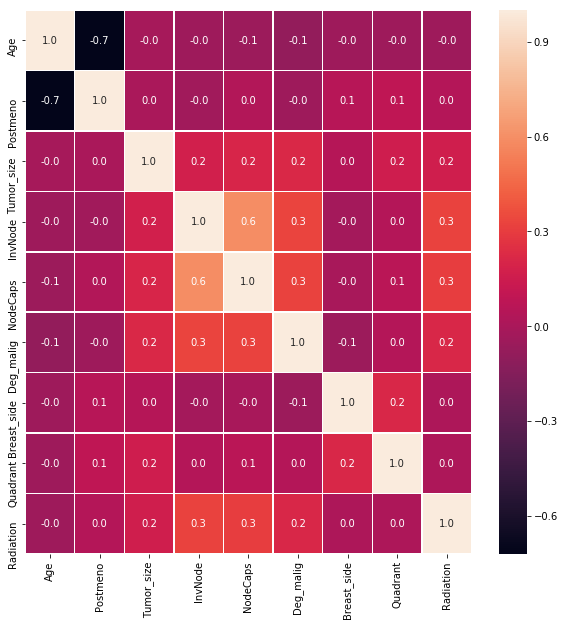

In [42]:
plt.subplots(figsize=(10,10))
sns.heatmap(X.corr(method ='pearson'), annot= True, linewidths=.5, fmt= '.1f')
plt.show()

# method ='pearson' , method ='kendall', method ='spearman'

In [44]:
# model fitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.02, random_state=0)
#

In [45]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
ac = accuracy_score(y_test, pred)
print("Accuracy RF: {}".format(ac))


Accuracy RF: 1.0


D:\AI\Anaconda3\envs\UKDL\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


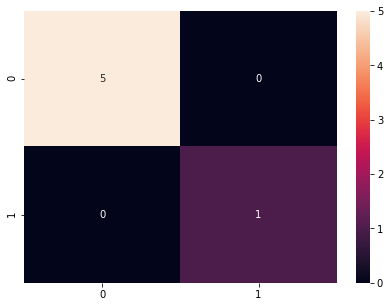

In [46]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [47]:
# saving model to disk

pickle.dump(model, open('model.pkl', 'wb'))


In [48]:
# Loading model to compare result

model = pickle.load(open('model.pkl', 'rb'))
prediction = model.predict([[4,0,4,0,1,1,1,3,0]])

if prediction[0] == 0:
    print("Breast Cancer No Recurrence")
else:
    print("breast cancer recurrence possible")

breast cancer recurrence possible
